In [1]:
from models import ModelTemplate, LightningWrapper, ExampleCNN, ExampleMlp
from torch.utils.data import DataLoader
from tqdm import tqdm
from data_loading import PokemonDataset
import os
from lightning import Trainer
from lightning.pytorch.loggers import TensorBoardLogger, CSVLogger
from torch import nn
import torch

CORES = 4 #os.cpu_count()

/home/felix/miniconda3/envs/torch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def test_loading(loader):
    for _ in tqdm(loader):
        pass

    for i in loader:
        for a in i:
            print(a.shape, a.dtype)
        return


train_dataset = PokemonDataset("train",)
val_dataset = PokemonDataset("val",)
train_loader = DataLoader(train_dataset, batch_size=64, num_workers=CORES)
val_loader  = DataLoader(val_dataset, batch_size=64, num_workers=CORES)
test_loader = DataLoader(PokemonDataset("test",), batch_size=64, num_workers=CORES)

test_loading(train_loader)
test_loading(val_loader)
test_loading(test_loader)

  0%|          | 0/81 [00:00<?, ?it/s]/home/felix/miniconda3/envs/torch/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/home/felix/miniconda3/envs/torch/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(

torch.Size([64, 6, 256, 256]) torch.float32
torch.Size([64]) torch.int64
torch.Size([64]) torch.int64


  0%|          | 0/21 [00:00<?, ?it/s]/home/felix/miniconda3/envs/torch/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/home/felix/miniconda3/envs/torch/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(

torch.Size([64, 6, 256, 256]) torch.float32
torch.Size([64]) torch.int64
torch.Size([64]) torch.int64


  0%|          | 0/26 [00:00<?, ?it/s]/home/felix/miniconda3/envs/torch/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/home/felix/miniconda3/envs/torch/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(

torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32
torch.Size([6, 256, 256]) torch.float32


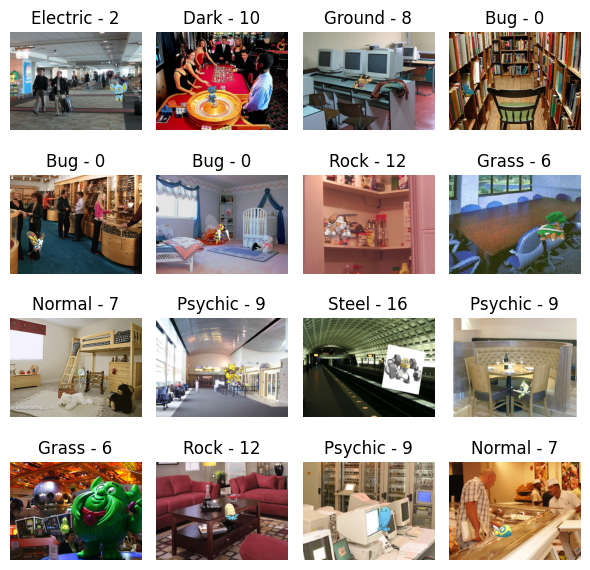

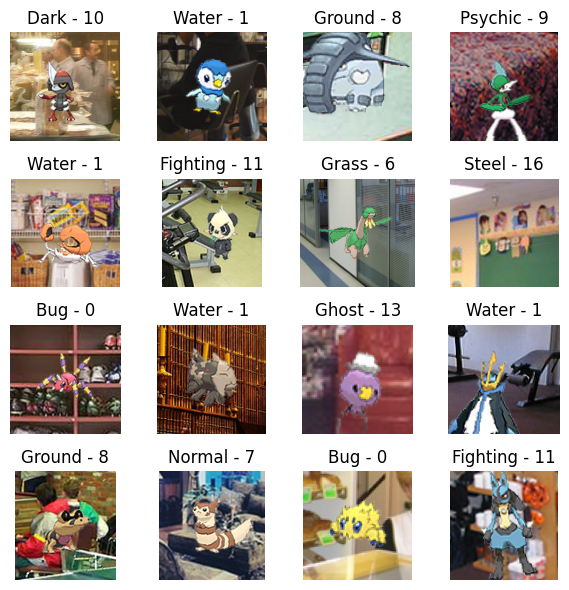

In [3]:
train_dataset.plot_examples()
train_dataset.plot_examples_crops()

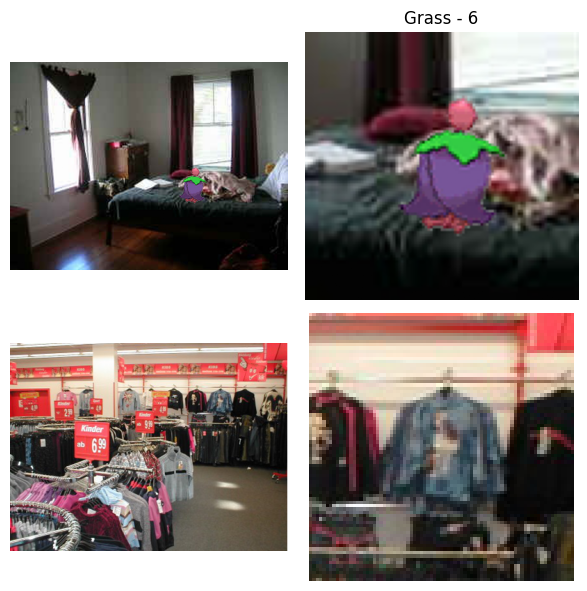

In [4]:
train_dataset.plot_examples_both()


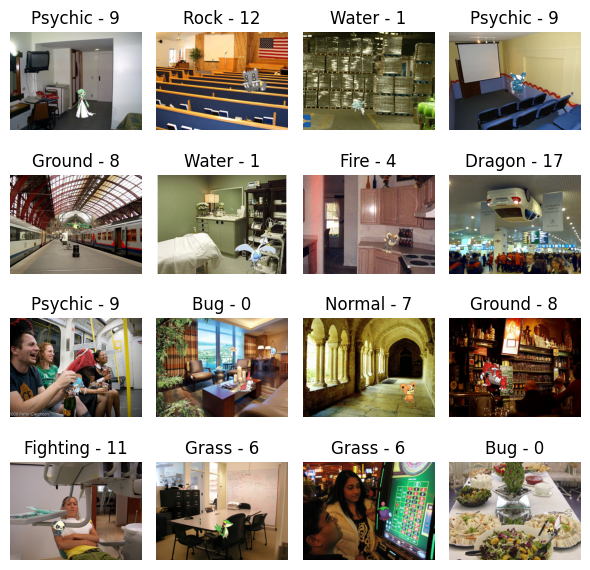

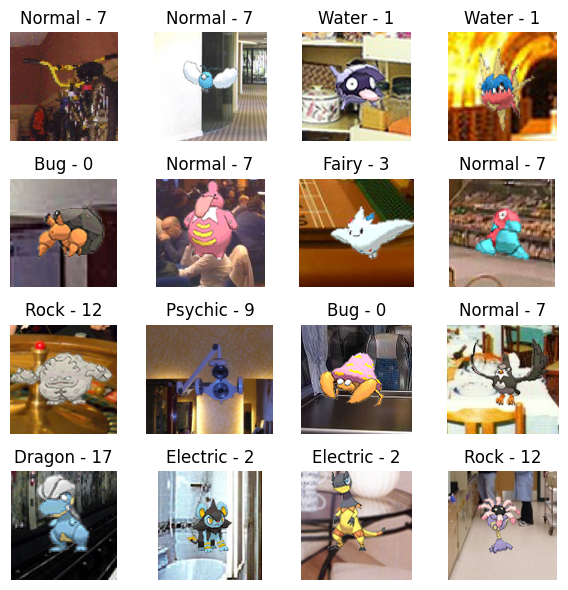

In [5]:
val_dataset.plot_examples()
val_dataset.plot_examples_crops()

6 Grass


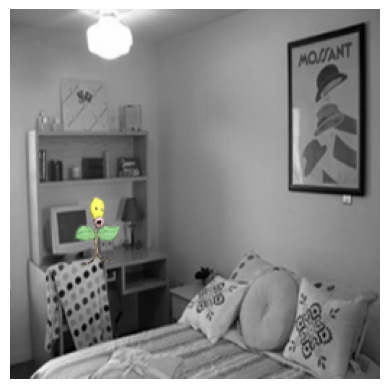

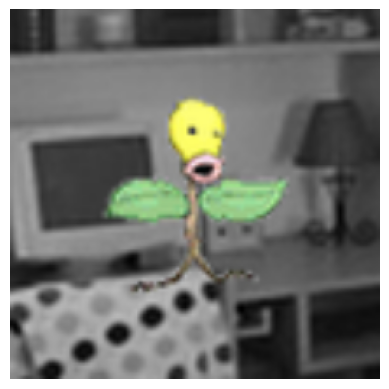

1 Water


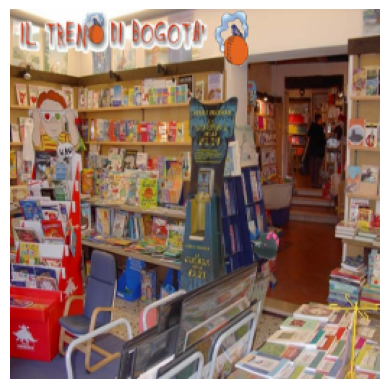

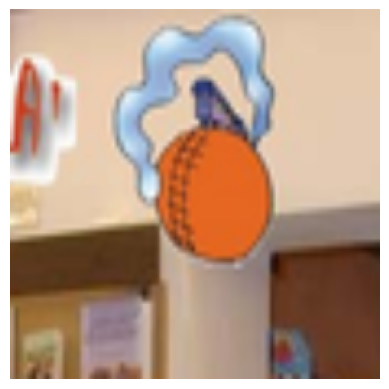

16 Steel


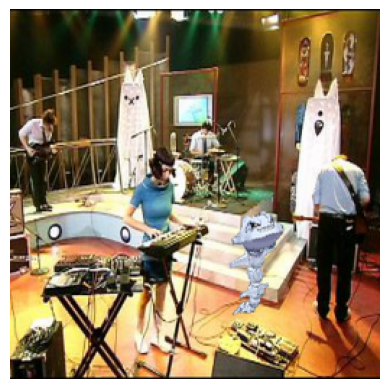

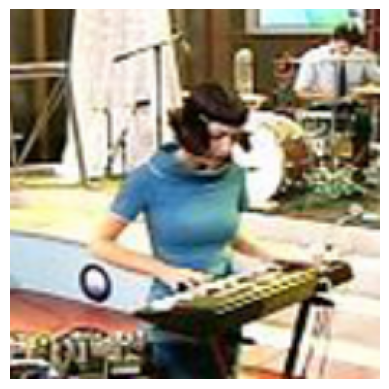

2 Electric


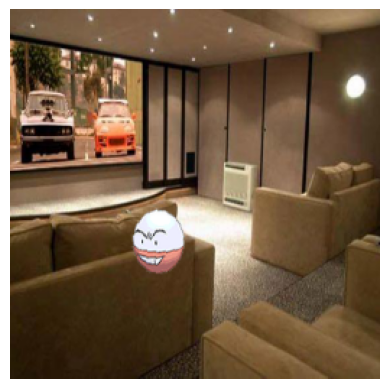

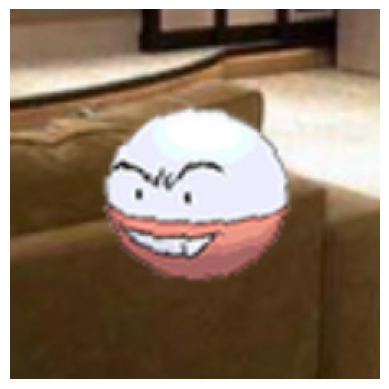

4 Fire


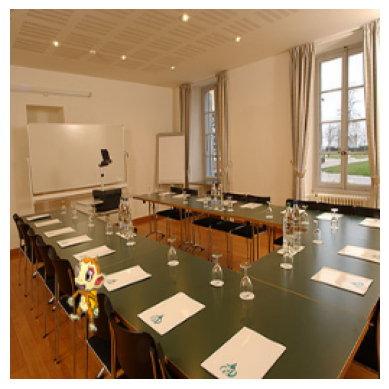

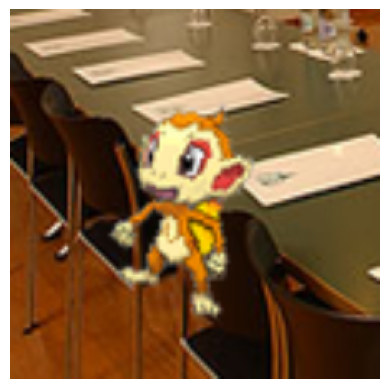

0 Bug


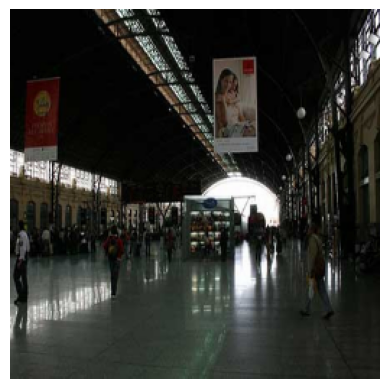

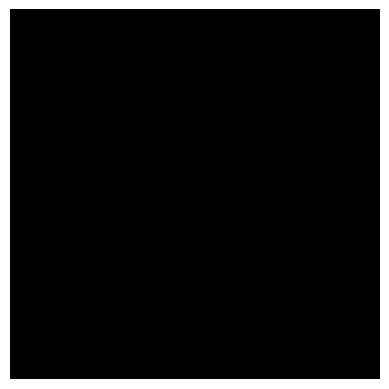

7 Normal


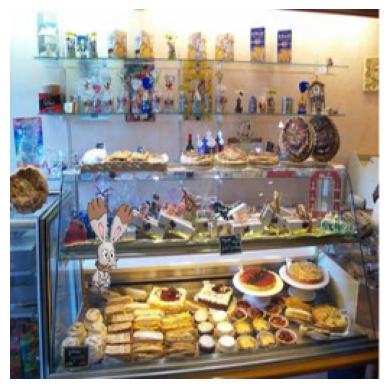

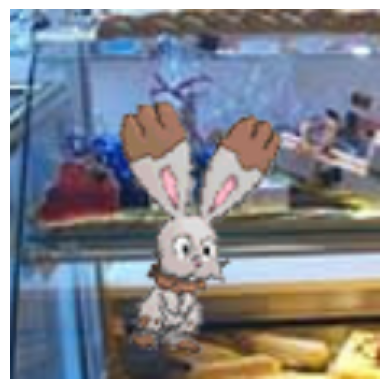

0 Bug


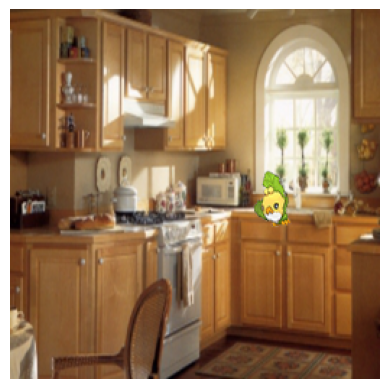

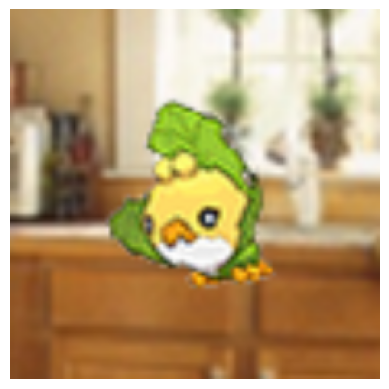

16 Steel


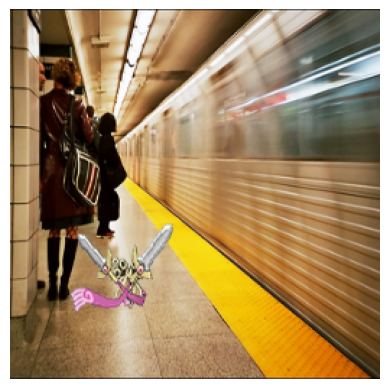

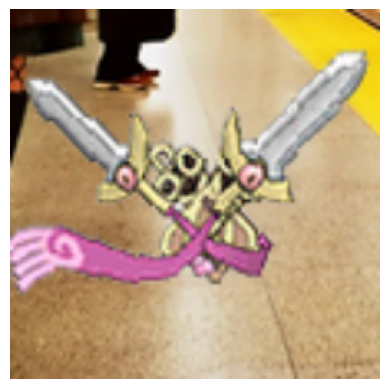

7 Normal


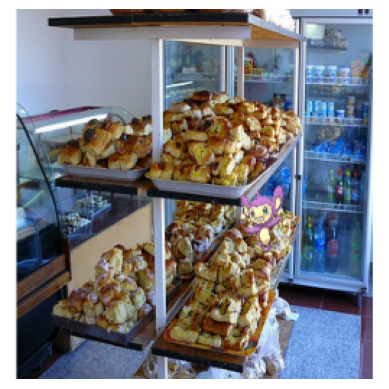

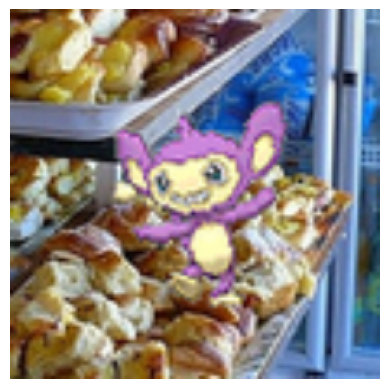

In [39]:
import numpy as np
import matplotlib.pyplot as plt


for index in np.random.choice(len(train_dataset), 10):


    img, label, count = train_dataset[index]
    print(label, train_dataset.df.iloc[index].main_type)
    img = ((img.permute(1,2,0).numpy() + 1 ) / 2 * 255).astype(int)
    orig = img[:,:,:3]
    crop = img[:,:,3:]

    plt.imshow(orig)
    plt.axis("off")
    plt.show()
    plt.imshow(crop)
    plt.axis("off")
    plt.show()
